### This is the final code fo my thesis.

Title: 'Crop prediction'

import the necessary module for preprocessing and training, testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

In [2]:
data=pd.read_csv("project_data.csv")

In [3]:
data.head()

,Station,YEAR,AMT,AMiT,AR,AH,AWS,ACC,ABS,R Area,R Pro,W Area,W Pro,GN Area,GN Pro,Tob Area,Tob Pro,Ba Area,Ba Pro
0,Dinajpur,2000,33.316667,20.000000,124.833333,81.083333,0.566667,3.216667,6.183333,1452000,1328000,229857,115654,350,150,580,175,2772,18035
1,Dinajpur,2001,33.691667,20.250000,185.500000,79.500000,0.558333,3.166667,6.616667,1396000,1285000,239835,119874,390,185,450,140,2790,18072
2,Dinajpur,2002,33.600000,20.283333,212.416667,80.666667,0.608333,3.475000,6.725000,1364000,1254000,238917,120012,420,210,480,150,3075,18247
3,Dinajpur,2003,33.133333,20.066667,171.416667,82.250000,0.608333,3.500000,6.158333,1402000,1410000,245328,129981,550,235,390,100,3257,18820
4,Dinajpur,2004,33.383333,20.025000,191.083333,81.333333,0.575000,3.558333,5.891667,1497000,1390000,249835,136545,730,295,320,80,3588,19720


In [4]:
data.info

<bound method DataFrame.info of      Station  YEAR        AMT       AMiT          AR         AH       AWS  \
0   Dinajpur  2000  33.316667  20.000000  124.833333  81.083333  0.566667   
1   Dinajpur  2001  33.691667  20.250000  185.500000  79.500000  0.558333   
2   Dinajpur  2002  33.600000  20.283333  212.416667  80.666667  0.608333   
3   Dinajpur  2003  33.133333  20.066667  171.416667  82.250000  0.608333   
4   Dinajpur  2004  33.383333  20.025000  191.083333  81.333333  0.575000   
5   Dinajpur  2005  33.508333  20.391667  247.916667  80.750000  0.508333   
6   Dinajpur  2006  34.241667  20.616667  107.083333  78.750000  0.591667   
7   Dinajpur  2007  34.250000  20.375000  131.583333  78.916667  0.700000   
8   Dinajpur  2008  33.391667  20.500000  147.666667  80.750000  0.633333   
9   Dinajpur  2009  33.958333  20.533333  168.750000  78.166667  1.625000   
10  Dinajpur  2010  34.383333  20.666667  136.750000  77.750000  1.758333   
11  Dinajpur  2011  33.550000  20.125000  13

In [5]:
model = data

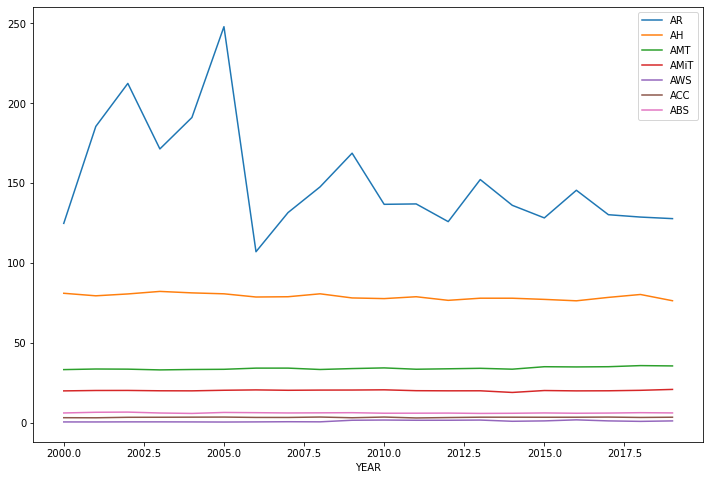

In [6]:
model.groupby("YEAR").sum()['AR'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['AH'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['AMT'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['AMiT'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['AWS'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['ACC'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['ABS'].plot(figsize=(12,8));

plt.legend()

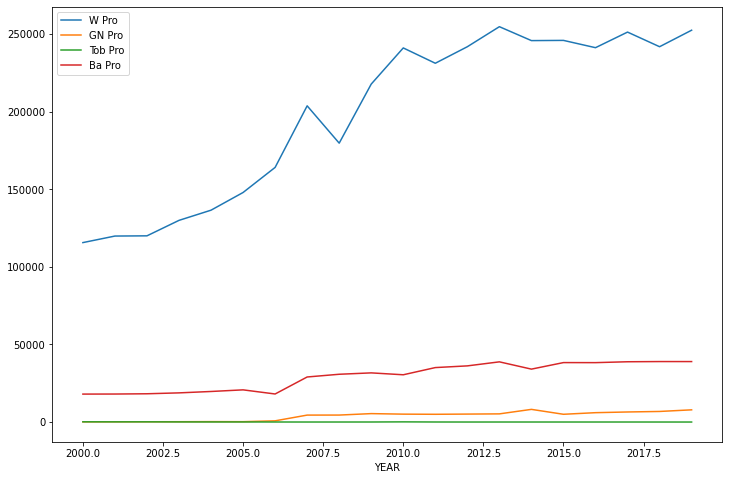

In [7]:
#model.groupby("YEAR").sum()['R Pro'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['W Pro'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['GN Pro'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['Tob Pro'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['Ba Pro'].plot(figsize=(12,8));
#model.groupby("YEAR").sum()['ACC'].plot(figsize=(12,8));
#model.groupby("YEAR").sum()['ABS'].plot(figsize=(12,8));

plt.legend()

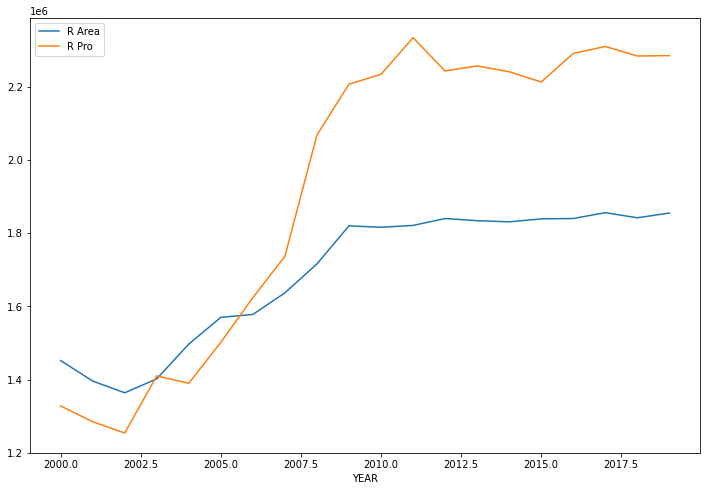

In [8]:
model.groupby("YEAR").sum()['R Area'].plot(figsize=(12,8));
model.groupby("YEAR").sum()['R Pro'].plot(figsize=(12,8));

plt.legend()

Text(0.5, 1.0, 'Year VS Rainfall for Dinajpur')

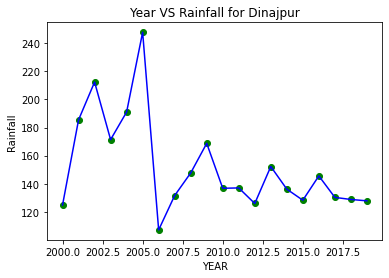

In [9]:
plt.plot(data['YEAR'],data['AR'],color='Blue')
plt.scatter(data['YEAR'],data['AR'],color='green')

plt.xlabel("YEAR")
plt.ylabel("Rainfall")
plt.title("Year VS Rainfall for Dinajpur")

Text(0.5, 1.0, 'Year VS Rainfall for Dinajpur')

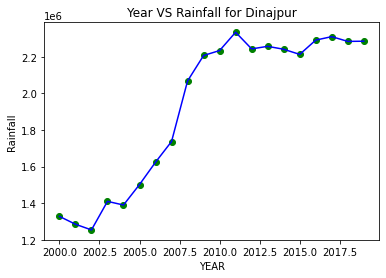

In [10]:
plt.plot(data['YEAR'],data['R Pro'],color='Blue')
plt.scatter(data['YEAR'],data['R Pro'],color='green')

plt.xlabel("YEAR")
plt.ylabel("Rainfall")
plt.title("Year VS Rainfall for Dinajpur")

# Linear Regression

### Here we predict rainfall with respect to Year

In [11]:
x = data['YEAR'].values.reshape(-1,1)
y = data['AR'].values.reshape(-1,1)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# create new linear model object
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_predict = linear_model.predict(x_test)

In [16]:
#To retrieve the intercept:
print(linear_model.intercept_)
#For retrieving the slope:
print(linear_model.coef_)

[10769.55818006]
[[-5.27859734]]


In [17]:
x=[[2020],[2021],[2022]]    # prediction of Rain for 2020,2021,2022
#=arr.reshape(1,-1)
linear_model.predict(x)

array([[106.79155328],
       [101.51295594],
       [ 96.2343586 ]])

In [18]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
df

,Actual,Predicted
0,185.500000,207.084903
1,191.083333,191.249111
2,127.798000,112.070151
3,131.583333,175.413319
4,124.833333,212.363500
5,152.250000,143.741735
6,128.250000,133.184540
7,107.083333,180.691916


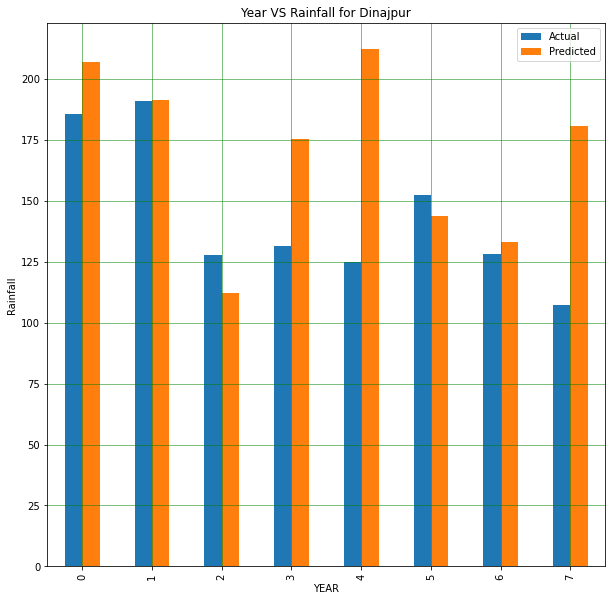

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("YEAR")
plt.ylabel("Rainfall")
plt.title("Year VS Rainfall for Dinajpur")
plt.show()

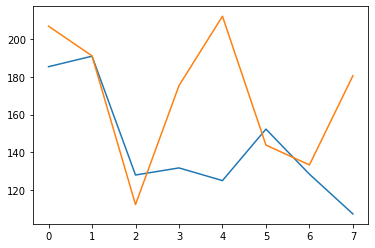

In [20]:
plt.plot(df)

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 23.861351822920696
Mean Squared Error: 1352.79602925348
Root Mean Squared Error: 36.78037559967924


### Predict Rainfall with respect of other features

In [21]:
X = data[['YEAR','AMT','AMiT','AH']].values
y = data['AR'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [26]:
df1

,Actual,Predicted
0,128.775000,173.041413
1,185.500000,138.536016
2,127.798000,141.037387
3,147.666667,203.223385


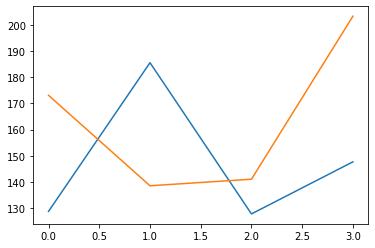

In [27]:
plt.plot(df1)

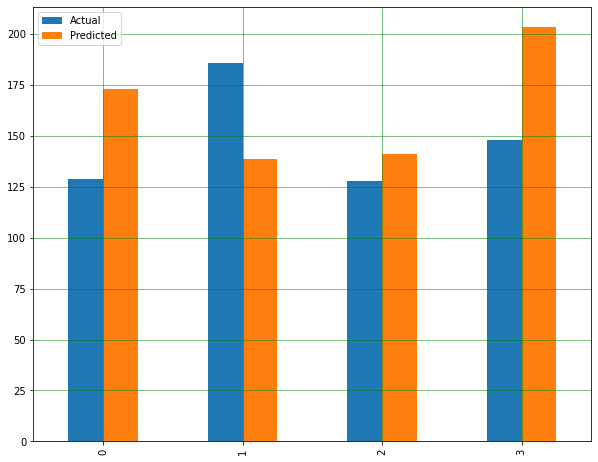

In [28]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 40.006625480835574
Mean Squared Error: 1856.7403491822736
Root Mean Squared Error: 43.08991006236


### Prediction of Rice for different features

In [30]:
X = data[['YEAR','AR','AMT','AMiT','AH','R Area']].values
y = data['R Pro'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [35]:
df1

,Actual,Predicted
0,2284000,2.264485e+06
1,1285000,1.172824e+06
2,2285000,2.461304e+06
3,2068000,2.085767e+06


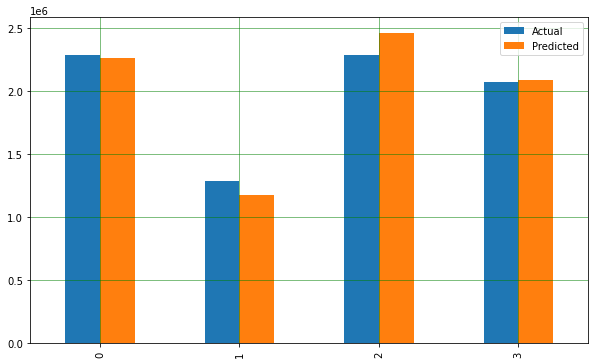

In [36]:
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() 

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)/10000)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)/(10000*10000))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/10000)

Mean Absolute Error: 8.144056498481707
Mean Squared Error: 110.90759382629135
Root Mean Squared Error: 10.531267436842127


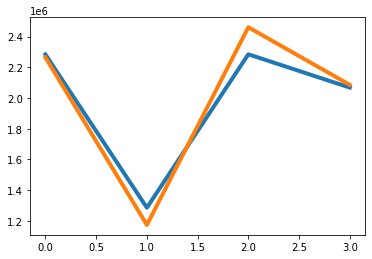

In [38]:
plt.plot(df1, linewidth=4)

In [39]:
x=[[2020],[2021],[2022]]    # prediction of rice for 2020,2021,2022
#=arr.reshape(1,-1)
linear_model.predict(x)

array([[106.79155328],
       [101.51295594],
       [ 96.2343586 ]])